Optimal Production: x1 = 40.00, x2 = 20.00
Maximum Profit: 2200.00


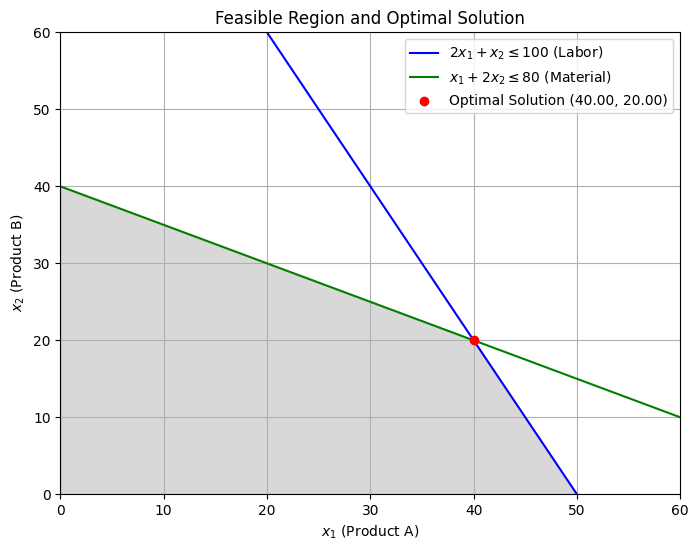

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

# Define coefficients for the objective function (maximize profit)
c = [-40, -30]  # Negative for maximization

# Define inequality constraints (Ax <= b)
A = [[2, 1],    # Labor constraint
     [1, 2]]    # Material constraint
b = [100, 80]

# Define bounds for x1 and x2 (Non-negativity constraints)
x_bounds = (0, None)
y_bounds = (0, None)

# Solve the linear programming problem
result = linprog(c, A_ub=A, b_ub=b, bounds=[x_bounds, y_bounds], method="highs")

# Extract optimal values
x1_opt, x2_opt = result.x
optimal_value = -result.fun  # Convert back to maximization

print(f"Optimal Production: x1 = {x1_opt:.2f}, x2 = {x2_opt:.2f}")
print(f"Maximum Profit: {optimal_value:.2f}")

# Visualization of Feasible Region
x1 = np.linspace(0, 60, 100)  # Range for x1

# Compute x2 values for the constraints
x2_labor = (100 - 2*x1)  # x2 from 2x1 + x2 <= 100
x2_material = (80 - x1) / 2  # x2 from x1 + 2x2 <= 80

# Plot feasible region
plt.figure(figsize=(8, 6))
plt.plot(x1, x2_labor, label=r"$2x_1 + x_2 \leq 100$ (Labor)", color="b")
plt.plot(x1, x2_material, label=r"$x_1 + 2x_2 \leq 80$ (Material)", color="g")

# Shade the feasible region
plt.fill_between(x1, np.minimum(x2_labor, x2_material), 0, where=(x1 >= 0), color='gray', alpha=0.3)

# Plot optimal point
plt.scatter(x1_opt, x2_opt, color='red', zorder=3, label=f"Optimal Solution ({x1_opt:.2f}, {x2_opt:.2f})")

# Labels and legend
plt.xlim(0, 60)
plt.ylim(0, 60)
plt.xlabel("$x_1$ (Product A)")
plt.ylabel("$x_2$ (Product B)")
plt.title("Feasible Region and Optimal Solution")
plt.legend()
plt.grid()
plt.show()